In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
sns.set()

In [2]:
random_seed = 17

In [ ]:
X, Y = get_data(True_positive="L1+Alu", True_negative="Random from genome")

In [76]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=random_seed, test_size=0.3)

In [77]:
y_train.mean(), y_test.mean()

(0.49557315936626284, 0.5103260869565217)

In [79]:
tr = RandomForestClassifier(max_depth=5, n_estimators=100, random_state=random_seed)
params = {"max_depth":[5,8,11,15,20], "n_estimators":[100,1000,2000]}

In [80]:
grid = GridSearchCV(tr, param_grid=params, n_jobs=6, cv=5)

In [81]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=17, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=6,
       param_grid={'max_depth': [5, 8, 11, 15, 20], 'n_estimators': [100, 1000, 2000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [82]:
grid.best_score_, grid.best_params_

(0.8240913327120224, {'max_depth': 20, 'n_estimators': 2000})

In [83]:
y_pred = grid.best_estimator_.predict(x_test)

In [85]:
fpr, tpr, _ = roc_curve(y_test, grid.best_estimator_.predict_proba(x_test)[:,1])

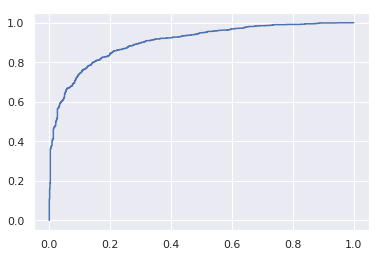

In [86]:
plt.plot(fpr,tpr);

In [88]:
auc(fpr, tpr), accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred)

(0.8266304347826087, 0.8452115812917594, 0.8083067092651757)

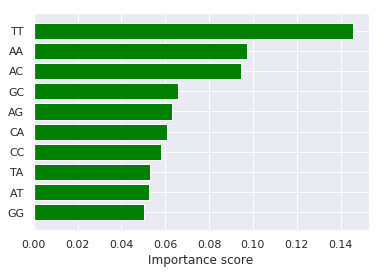

In [92]:
fig, ax = plt.subplots()

feature_importance = grid.best_estimator_.feature_importances_.round(4)
feature_importance = zip(X.keys(), feature_importance)
feature_importance = np.array(sorted(list(feature_importance), key=lambda x:x[1], reverse=True))

y_pos = np.arange(10)

ax.barh(y_pos, fi_s[:10, 1].astype('float'), align='center', color='green')
ax.set_yticks(y_pos)
ax.set_yticklabels(feature_importance[:10, 0])
ax.invert_yaxis()
ax.set_xlabel('Importance score')

plt.show()

In [93]:
feature_importance = (gr.best_estimator_.feature_importances_).round(4)
feature_importance = zip(X.keys(), feature_importance)
feature_importance = sorted(list(feature_importance), key=lambda x:x[1], reverse=True)
pd.DataFrame(feature_importance, columns=['Feature_name', 'Feature_importance']).head(10)

,Feature_name,Feature_importance
0,TT,0.1455
1,AA,0.0973
2,AC,0.0946
3,GC,0.0659
4,AG,0.0629
5,CA,0.0608
6,CC,0.0581
7,TA,0.0532
8,AT,0.0527
9,GG,0.0504
